<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)

http://www.famaf.proed.unc.edu.ar/course/view.php?id=470



# IntML2020- Análisis de Componentes y Discriminantes

Ejercicio 1: Estudie el grupo de datos sobre cancer de mama, diga cuantas clases hay, cuantos datos y cuantas variables.

In [1]:
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

* Estudie la siguiente afirmación: "PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class separability." Para ello proyecte las clases en las dos primeras componentes principales y en ''el'' discriminante. 

* Diga si las clases son linealmente separables en estos espacios. 

Ejercicio 2: Estudie el grupo de datos T8_3_FOOTBALL.dat. Se presentan 3 grupos de 30 sujetos cada uno, el primero de jugadores de futbol americano de secundaria (grupo1), el segundo de jugadores de universidad (grupo 2) y el tercero de control  (grupo 3). Las variables medidas son WDIM,CIRCUM,FBEYE,EYEHD,HEARHD,JAW, y son mediciones de la cabeza de los sujetos. 

In [4]:
import pandas as pd

df = pd.read_csv('T8_3_FOOTBALL.dat', header=None)
df.head()


,0
0,1 13.50 57.15 19.50 12.50 14.00 11.00
1,1 15.50 58.42 21.00 12.00 16.00 12.00
2,1 14.50 55.88 19.00 10.00 13.00 12.00
3,1 15.50 58.42 20.00 13.50 15.00 12.00
4,1 14.50 58.42 20.00 13.00 15.50 12.00


* (a) Realice un análisis discriminante sobre un 80% del conjunto datos, clasificando el 20% restante. 
* (b) Compare con los errores obtenidos clasificando con un Naive Gauss sobre el mismo conjunto de datos.
* (c) Escriba la matriz de confusion de ambos métodos. 


Para computar el error aparente puede usar la funcion 

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
qda = QuadraticDiscriminantAnalysis()
(iris_data, iris_target) = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
clf = qda.fit(X_train, y_train)
clf.score(X_test, y_test) 



1.0

Ejercicio 3: Limpieza de ruido y selección de dimensión. 
 * (a) Trabaje con el dataset digits, estudie cuantos datos tiene, cuantas variables  y cuantas clases.

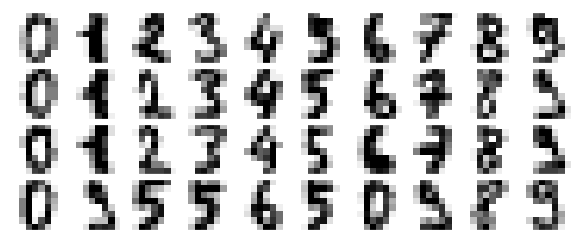

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

* Realice un análisis de componentes principales y extraiga las dos primarias. Plotee 

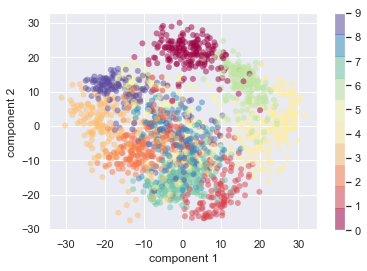

In [8]:

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


* (b) Explique  usando el radio de varianza explicada porque este colorido dibujo no permite distinguir clases. Cuantas dimensiones son necesarias para obtener un 50% de varianza explicada?  Y un 80%?

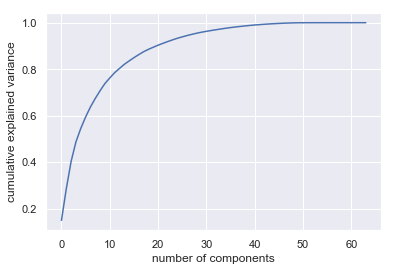

In [9]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* Si agregamos ruido a los digitos plotee el resultado

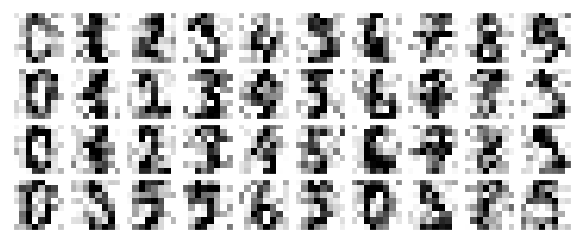

In [10]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

*  Realice un análisis de componentes principales que preserve el 50% de la varianza. Diga cuantas componentes le quedan. 

* Realice una clasificación con Naive Bayes sobre las primeras dos componentes, sobre las primeras 12 de los datos originales y sobre las primeras doce de los datos ruidosos. Diga cual clasificacion es mejor usando errores aparentes.

* Reconstruya los datos a partir de las 12 componentes principales ruidosas y plotee el resultado. 


Ejercicio 4: 
* Levante el grupo de datos Labeled Faces in the Wild dataset, y diga cuantas variables tiene, cuantos datos, cuantas clases y la dimension del espacio de discriminación.  
* Realice un estudio de componentes principales con 150 componentes, usando la kwyword randomized para acelerar el algoritmo. 

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)


In [ ]:
print(faces.target_names)
print(faces.images.shape)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized',whiten=False)
pca.fit(faces.data)

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

* Diga cual es la varianze explicada por las primeras 150 componentes. 

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Compute the components and projected faces

components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

* Clasifique las caras con el método de su elección y compute el error aparente. 